In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from CreatePlotsD import createCombinedPlots
# from matplotlib.backends.backend_pdf import PdfPages

# Undrained Cyclic TXC Tests

The fit parameters a and b are 0.2787895558696246 and -0.23940156519301617


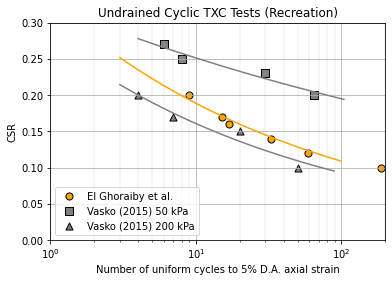

In [2]:
# power law fit function
def power(x, a, b):
    return (a * (x**b))

#----  Data Set --------

csr1 = np.array([0.2, 0.17, 0.16, 0.14, 0.12, 0.10])
cycles1 = np.array([9, 15, 17, 33, 59, 188])
plt.scatter(cycles1, csr1, s=50, c='orange', edgecolor = 'black', label = 'El Ghoraiby et al.')

# fitting the curve
param, param_cov = curve_fit(power, cycles1, csr1);

# setting the parameter values
a, b = param;

# setting x values for best fit line
x_line = np.arange(min(cycles1)-6, 100, 1)

# output of curve data
y_line = power(x_line, a, b)

# plotting curve
plt.plot(x_line, y_line, 'orange')

#---- Vasko 50 kPa Data Set --------

# Based off of plots from tests
csr2 = np.array([0.27, 0.25, 0.23, 0.2])
cycles2 = np.array([6, 8, 30, 65])
plt.scatter(cycles2, csr2, s=50, c='grey', marker = 's', edgecolor = 'black', label = 'Vasko (2015) 50 kPa')

# fitting the curve
param, param_cov = curve_fit(power, cycles2, csr2);

# setting the parameter values
a, b = param;

# setting x values for best fit line
x_line = np.arange(min(cycles2)-2, max(cycles2)+40, 1)

# output of curve data
y_line = power(x_line, a, b)

# plotting curve
plt.plot(x_line, y_line, 'grey')

#---- Vasko 200 kPa Data Set --------

# Based off of plots from tests
csr3 = np.array([0.2, 0.17, 0.15, 0.1])
cycles3 = np.array([4, 7, 20, 50])
plt.scatter(cycles3, csr3, s=50, c='grey', marker = '^', edgecolor = 'black', label = 'Vasko (2015) 200 kPa')

# fitting the curve
param, param_cov = curve_fit(power, cycles3, csr3);

# setting the parameter values
a, b = param;
print('The fit parameters a and b are {} and {}'.format(a, b));

# setting x values for best fit line
x_line = np.arange(min(cycles3)-1, max(cycles3)+40, 1)

# output of curve data
y_line = power(x_line, a, b)

# plotting curve
plt.plot(x_line, y_line, 'grey')

#---------------------------------------------------------

# graph settings 
plt.xscale('log');
plt.xlim(1, 200);
plt.ylim(0, 0.3);
plt.grid(which = 'major');
plt.grid(which = 'minor', linewidth = '0.25');
plt.xlabel('Number of uniform cycles to 5% D.A. axial strain');
plt.ylabel('CSR');
plt.title('Undrained Cyclic TXC Tests (Recreation)');
plt.legend(loc = 'lower left');

# save plot
plt.savefig('UndrainedCyclicTXC.png');


# Undrained Cyclic DSS Tests

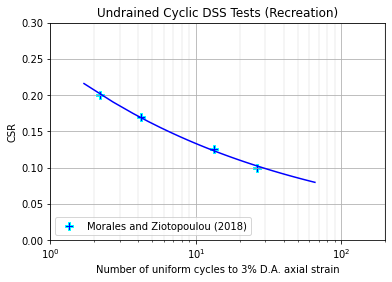

In [3]:
# power law fit function
def power(x, a, b):
    return (a * (x**b))

#---- Morales and Ziotopoulou Data Set --------

csr4 = np.array([0.1, 0.17, 0.2, 0.125])
cycles4 = np.array([26.2, 4.2, 2.2, 13.3])
plt.scatter(cycles4, csr4, s=60, c='blue', marker = 'P', edgecolor = 'cyan', label = 'Morales and Ziotopoulou (2018)')

# fitting the curve
param, param_cov = curve_fit(power, cycles4, csr4);

# setting the parameter values
a, b = param;

# setting x values for best fit line
x_line = np.arange(min(cycles4)-0.5, max(cycles4)+40, 1)

# output of curve data
y_line = power(x_line, a, b)

# plotting curve
plt.plot(x_line, y_line, 'blue')

#----------------------------------------------------

# graph settings 
plt.xscale('log');
plt.xlim(1, 200);
plt.ylim(0, 0.3);
plt.grid(which = 'major');
plt.grid(which = 'minor', linewidth = '0.25');
plt.xlabel('Number of uniform cycles to 3% D.A. axial strain');
plt.ylabel('CSR');
plt.title('Undrained Cyclic DSS Tests (Recreation)');
plt.legend(loc = 'lower left');

# save plot
plt.savefig('UndrainedCyclicDSS.png');


# Functions

In [1]:
def readFiles(fname, maxgamma):
    f = fname;
    
    # read in columns corresponding to each value
    shearstrain = np.genfromtxt(f, delimiter="\t", skip_header=1, usecols = (0));
    # indices = np.abs(shearstrain) <= maxgamma
    index = 0;
    for x in shearstrain:
        index += 1;
        if abs(x) > maxgamma:
            break;
    
    shearstress = np.genfromtxt(f, delimiter= "\t", skip_header=1, usecols = (1));
    effectivestress = np.genfromtxt(f, delimiter = "\t", skip_header=1, usecols = (3));
    axialstrain = np.genfromtxt(f, delimiter = "\t", skip_header=1, usecols = (2));
    
    return shearstrain[:index], shearstress[:index], effectivestress[:index], axialstrain[:index]


def StressStrain(pdfname, shearstrain, shearstress, effectivestress, axialstrain):
    
    pdfn = pdfname;
    
    
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 5, 1)

    # Shear stress (kPA) vs. Shear strain (%)
    plt.plot(shearstrain, shearstress, 'black');
    plt.grid(which = 'major');
    plt.grid(which = 'minor', linewidth = '0.5');
    plt.xlabel(r'$\gamma$ (%)');
    plt.ylabel(r'$\tau$ (kPa)');
    

    plt.subplot(1, 5, 2)

    # Shear stress (kPA) vs. Effective Vertical Stress (kPA)
    plt.plot(effectivestress, shearstress, 'blue');
    plt.grid(which = 'major');
    plt.grid(which = 'minor', linewidth = '0.5');
    plt.xlabel(r'$\sigma_v$ (%)');
    plt.ylabel(r'$\tau$ kPa)');
    

    plt.subplot(1, 5, 3)

    # Effective Vertical Stress (kPA) vs. Shear Strain (%)
    plt.plot(shearstrain, effectivestress, 'green'); 
    plt.title(pdfn); # title of the test
    plt.grid(which = 'major');
    plt.grid(which = 'minor', linewidth = '0.5');
    plt.xlabel(r'$\gamma$ (%)');
    plt.ylabel(r'$\sigma_v$ (kPa)');


    plt.subplot(1, 5, 4)

    # Axial Strain (%) vs. Shear Strain (%)
    plt.plot(shearstrain, axialstrain, 'red');
    plt.grid(which = 'major');
    plt.grid(which = 'minor', linewidth = '0.5');
    plt.xlabel(r'$\gamma$ (%)');
    plt.ylabel(r'Axial Strain (kPa)');
    
    plt.subplot(1, 5, 5)

    # Ru vs. Shear Strain (%)
    ru = 1 - effectivestress/effectivestress[0]
    plt.plot(shearstrain, ru, 'black', label = r"$1 - \frac{\sigma_v}{\sigma_{vo}}$");
    plt.grid(which = 'major');
    plt.grid(which = 'minor', linewidth = '0.5');
    plt.xlabel(r'$\gamma$ (%)');
    plt.ylabel(r'Ru');
    plt.legend();
    
    plt.tight_layout();

    plot = plt.savefig(pdfn, format = 'pdf')
    
    plt.close()

    return pdfn

def cycles(shearstress, level):
    maxtau = np.max(shearstress)
    shearstress -= level;
    prev = shearstress[0];
    count = 0;
    for x in shearstress[1:]:
        if prev*x < 0:
            count+=1;
        prev = x;
        
    return count/2, maxtau

def WriteCycles(fname, csr, ncycles):
    expdata = open(fname, 'a');
    expdata.write('{:6.3f} {:6.2f}\n'.format(csr, ncycles))
    expdata.close();
    
    return
    

    

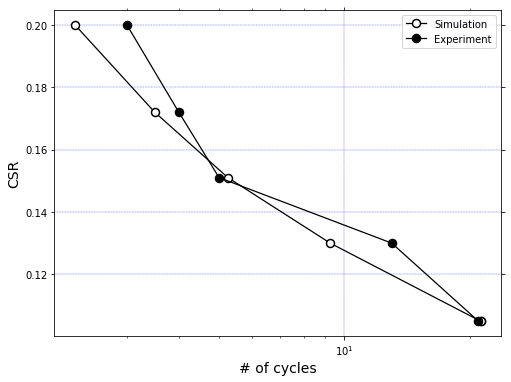

In [6]:
files = ["170727_DSSc_KZ8.txt", "170731_DSSc_BM11.txt", "170809_DSSc_BM17.txt", "170728_DSSc_BM9.txt",  "170802_DSSc_BM13.txt", "170808_DSSc_BM16.txt"]

from PyPDF2 import PdfFileReader, PdfFileMerger # for creating a combined pdf of all stress strain plots

results = PdfFileMerger()
expdata = 'Ottawa_F65_ExpData.txt';
open(expdata, 'w').close();


for x in files:
    shearstrain, shearstress, effectivestress, axialstrain = readFiles(x, 3);
    pdfname = StressStrain(x.replace(".txt", ".pdf"), shearstrain, shearstress, effectivestress, axialstrain);
    cyclescount, maxtau = cycles(shearstress, -5)
    csr = maxtau/effectivestress[0];
    WriteCycles(expdata, csr, cyclescount);
    # print(cyclescount)
    pdf_file = PdfFileReader(pdfname)
    results.append(pdfname)

createCombinedPlots(expDataFile=expdata, simDataFile='nCyclesResultD.dat', cols=1)
    
with open("Ottawa-F65-StressStrainPlots.pdf", "wb") as output_stream:
    results.write(output_stream)
        

    